In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
# importing dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# checking for categories in outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

EDA

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

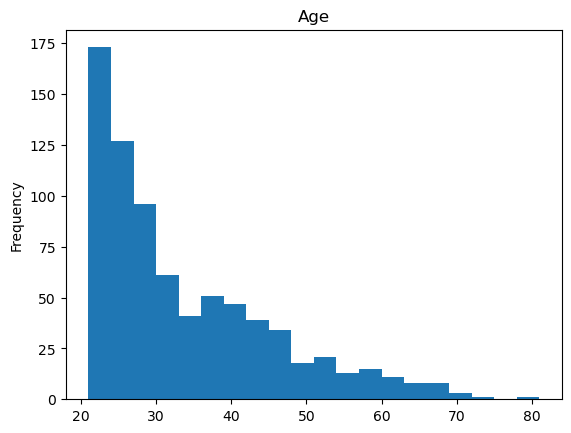

In [11]:
# age distribution
df['Age'].plot(kind='hist', bins=20, title='Age')

<Axes: >

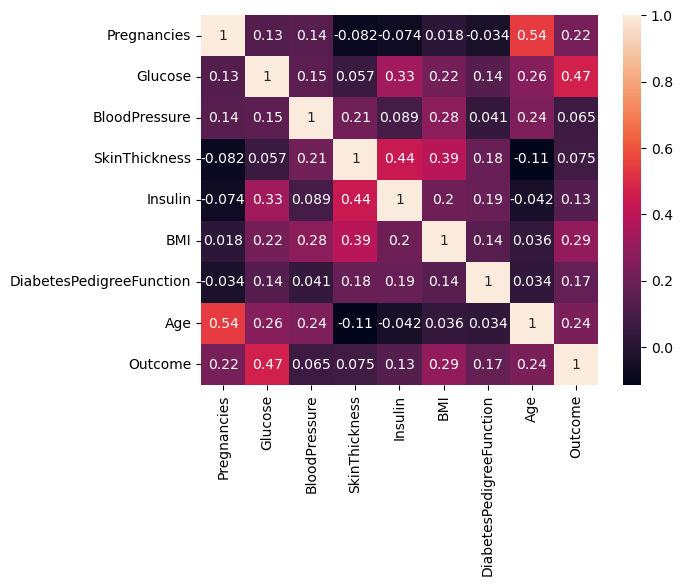

In [13]:
# checking for correlations

df.corr()

sns.heatmap(df.corr(), annot=True)

Machine learning phase

In [14]:
# feature selection
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [15]:
# preprocessing data for model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [20]:
# model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [29]:
x_pred = model.predict(X_test)
test_data_accuracy = model.score(X_test, y_test)
print('Accuracy of the model on test data:', test_data_accuracy)

Accuracy of the model on test data: 0.7142857142857143


In [30]:
y_pred = model.predict(X_train)
train_data_accuracy = model.score(X_train, y_train)
print('Accuracy of the model on train data:', train_data_accuracy)

Accuracy of the model on train data: 0.7915309446254072


In [21]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7142857142857143
Confusion Matrix:
 [[82 18]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



ROC AUC Score: 0.8229629629629629


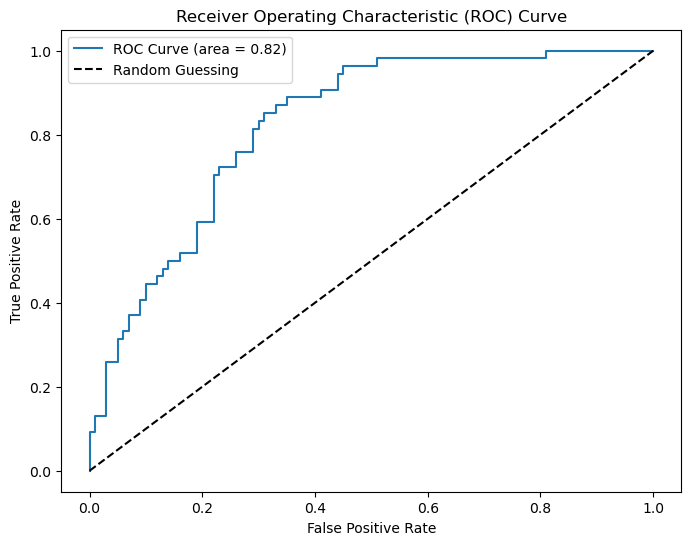

In [22]:
# model evaluation
from sklearn.metrics import roc_auc_score, roc_curve
y_score = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print("ROC AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Training the model with multiple classification models

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define classifiers to evaluate
classifiers = {
    'Logistic Regression': model,  # already trained
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

results = {}

# Logistic Regression is already trained
y_pred_lr = y_pred
results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

# Train and evaluate other classifiers
for name, clf in classifiers.items():
    if name == 'Logistic Regression':
        continue
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_clf)
    results[name] = acc

# Display results
for name, acc in results.items():
    print(f"{name}: Accuracy = {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

Logistic Regression: Accuracy = 0.7143
Random Forest: Accuracy = 0.7597
K-Nearest Neighbors: Accuracy = 0.7013
Decision Tree: Accuracy = 0.7208
SVM: Accuracy = 0.7532

Best model: Random Forest with accuracy 0.7597


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7597402597402597
Confusion Matrix:
 [[85 15]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

